# OBESITY LEVEL CLASSIFIER

 

    

- **The purpose of this Notebook is to explore and understand the data, as well as to develop a classification algorithm to determine the Obesity Level. Based on the information provided by the interviewee, this algorithm will allow us to assess their health in relation to body fat.**

## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings

# Ignore warniings
warnings.filterwarnings("ignore", category=FutureWarning)


# Libraries and Python version
library = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Sklearn":sklearn
    }

# Libraries version
print("Library Version:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Library':^20} | {'Version':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, library in sorted(library.items()):
    print(f"{nome:<20} | {library.__version__:>10}")

# Python Version    
print()
print(f"Python Version: {python_version()}")

Library Version:

-------------------- | ----------
      Library        |  Version  
-------------------- | ----------
Matplotlib           |      3.8.4
NumPy                |     1.26.1
Pandas               |      2.2.1
Seaborn              |     0.13.2
Sklearn              |      1.3.1

Python Version: 3.10.4


# Setting up mlflow autolog

* USE COMMAND `mlflow server --port 5000` before setting up mlflow

In [3]:
import mlflow

In [4]:
print("mlflow version: ",mlflow.__version__)

mlflow version:  2.12.1


In [5]:
mlflow.set_tracking_uri(uri="http://localhost:5000")

In [11]:
import xgboost

In [12]:
exp_id = mlflow.set_experiment("Autolog Experiment")
mlflow.sklearn.autolog()
mlflow.xgboost.autolog()

## IMPORTING DATA

In [35]:
#Importing Data
df = pd.read_csv('ObesityLevels.csv')

In [36]:
#Visualizing data
display(df.head(5))
print(df.shape)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


(2111, 17)


##  DATA CLEANING

In [37]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Age,float64,1402,0
Gender,object,2,0
Height,float64,1574,0
Weight,float64,1525,0
CALC,object,4,0
FAVC,object,2,0
FCVC,float64,810,0
NCP,float64,635,0
SCC,object,2,0
SMOKE,object,2,0


In [38]:
#Organic Data
df_organic = df.head(498)

#Synthetic Data
df_synthetic = df.iloc[498:]

display(df_organic.tail(3))
display(df_synthetic.head(3))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
495,19.0,Male,1.80,60.0,no,yes,3.0,1.0,yes,no,1.0,yes,0.0,0.0,Always,Motorbike,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
497,20.0,Male,1.56,45.0,Sometimes,no,2.0,3.0,no,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
498,25.196214,Female,1.686306,104.572712,Sometimes,yes,3.0,3.0,no,no,1.152736,yes,0.319156,1.00000,Sometimes,Public_Transportation,Obesity_Type_III
499,18.503343,Female,1.683124,126.673780,Sometimes,yes,3.0,3.0,no,no,1.115967,yes,1.541072,1.00000,Sometimes,Public_Transportation,Obesity_Type_III
500,26.000000,Female,1.622397,110.792630,Sometimes,yes,3.0,3.0,no,no,2.704507,yes,0.000000,0.29499,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique_Organic'] = df_organic.nunique().values
df_info['Unique_Synthetic'] = df_synthetic.nunique().values
df_info

,Dtype,Unique_Organic,Unique_Synthetic
Age,float64,35,1381
Gender,object,2,2
Height,float64,47,1540
Weight,float64,91,1452
CALC,object,4,3
FAVC,object,2,2
FCVC,float64,3,810
NCP,float64,3,635
SCC,object,2,2
SMOKE,object,2,2


- **We can notice the discrepancy between the types of data in the columns FCVC, NCP, CH2O, FAF, and TUE. While in the organic data, the number of unique values matches the number of available options, in the synthetic data, this variation ranges from 635 to 1268 unique values.**
    
    
- **Now, I will make slight adjustments to ensure the data maintains a certain standard.** 
      

In [40]:
#Converting the "Age" column to integer
df['Age'] = df['Age'].astype(int)

#Float Columns
colunas_float = ['Height', 'Weight','NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Round the float columns to two decimal places
df[colunas_float] = df[colunas_float].round(2)

In [41]:
# Checking for duplicate values
df.duplicated().sum()

24

In [42]:
# Creating a new DataFrame containing only the duplicate rows
duplicated_df = df.loc[df.duplicated(keep=False), :]
duplicated_df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [43]:
# Droping duplicates
df = df.drop_duplicates()
df.shape

(2087, 17)

In [44]:
# Df Describe 
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00
mean,24.01,1.70,86.86,2.42,2.70,2.00,1.01,0.66
std,6.33,0.09,26.19,0.53,0.76,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.00,1.63,66.00,2.00,2.70,1.59,0.12,0.00
50%,22.00,1.70,83.10,2.40,3.00,2.00,1.00,0.63
75%,26.00,1.77,108.02,3.00,3.00,2.46,1.68,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [45]:
# Calculate the Body Mass Index (BMI)
df['BMI'] = round(df['Weight'] / (df['Height']) ** 2, 2)
df.head(1)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,24.39


## DATA PREPROCESSING

In [46]:
# Selecting categorical features
categorical_features = df.select_dtypes(exclude="number").columns
categorical_features

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [47]:
# Reset the index
df.reset_index(inplace=True)

# Rename the index column to "ID"
df.rename(columns={'index': 'ID'}, inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns except the Target column
encoder = LabelEncoder()
for i in categorical_features:
    df[i] = encoder.fit_transform(df[i])


df.head(5)

,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,0,21,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1,24.39
1,1,21,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1,24.24
2,2,23,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1,23.77
3,3,27,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5,26.85
4,4,22,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6,28.34


## TRAINING MODELS

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Features
X = df.drop('NObeyesdad', axis=1)
X=X.drop('ID',axis=1)
# Target variable 
y = df['NObeyesdad']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.metrics import recall_score, accuracy_score, precision_score



models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBoostClassifier": XGBClassifier()
}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        recall = recall_score(y_test, predictions, average='weighted')  
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 

        print(f"Model: {model_name}")
        print(f"Recall: {recall}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print("-" * 50)

2024/05/19 12:48:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:48:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

Model: RandomForestClassifier
Recall: 0.992822966507177
Accuracy: 0.992822966507177
Precision: 0.9930491875713088
--------------------------------------------------


2024/05/19 12:48:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:48:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

Model: DecisionTreeClassifier
Recall: 0.9712918660287081
Accuracy: 0.9712918660287081
Precision: 0.9718818446203207
--------------------------------------------------


2024/05/19 12:48:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:48:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

Model: ExtraTreesClassifier
Recall: 0.9665071770334929
Accuracy: 0.9665071770334929
Precision: 0.9681402137555846
--------------------------------------------------


2024/05/19 12:48:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:48:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

Model: XGBoostClassifier
Recall: 0.9736842105263158
Accuracy: 0.9736842105263158
Precision: 0.9749734376844605
--------------------------------------------------


2024/05/19 12:49:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:49:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

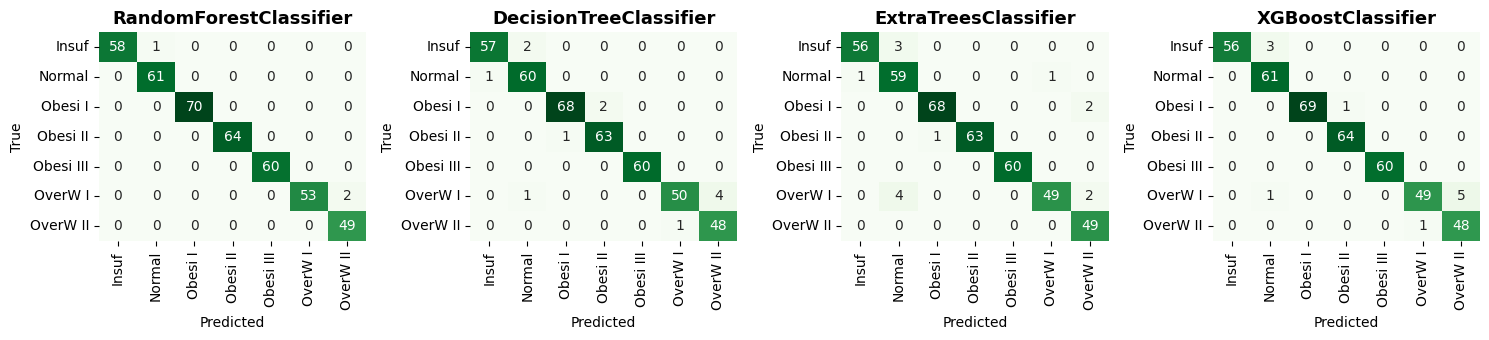

In [71]:
# Define the class labels
class_labels = ['Insuf', 'Normal', 'Obesi I', 'Obesi II', 'Obesi III', 'OverW I', 'OverW II']

# Create figure and axes
fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

# Plot confusion matrix for each model
for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=ax, 
                xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Adjust layout and show figure
plt.tight_layout()
plt.show()

2024/05/19 12:49:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/19 12:49:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\

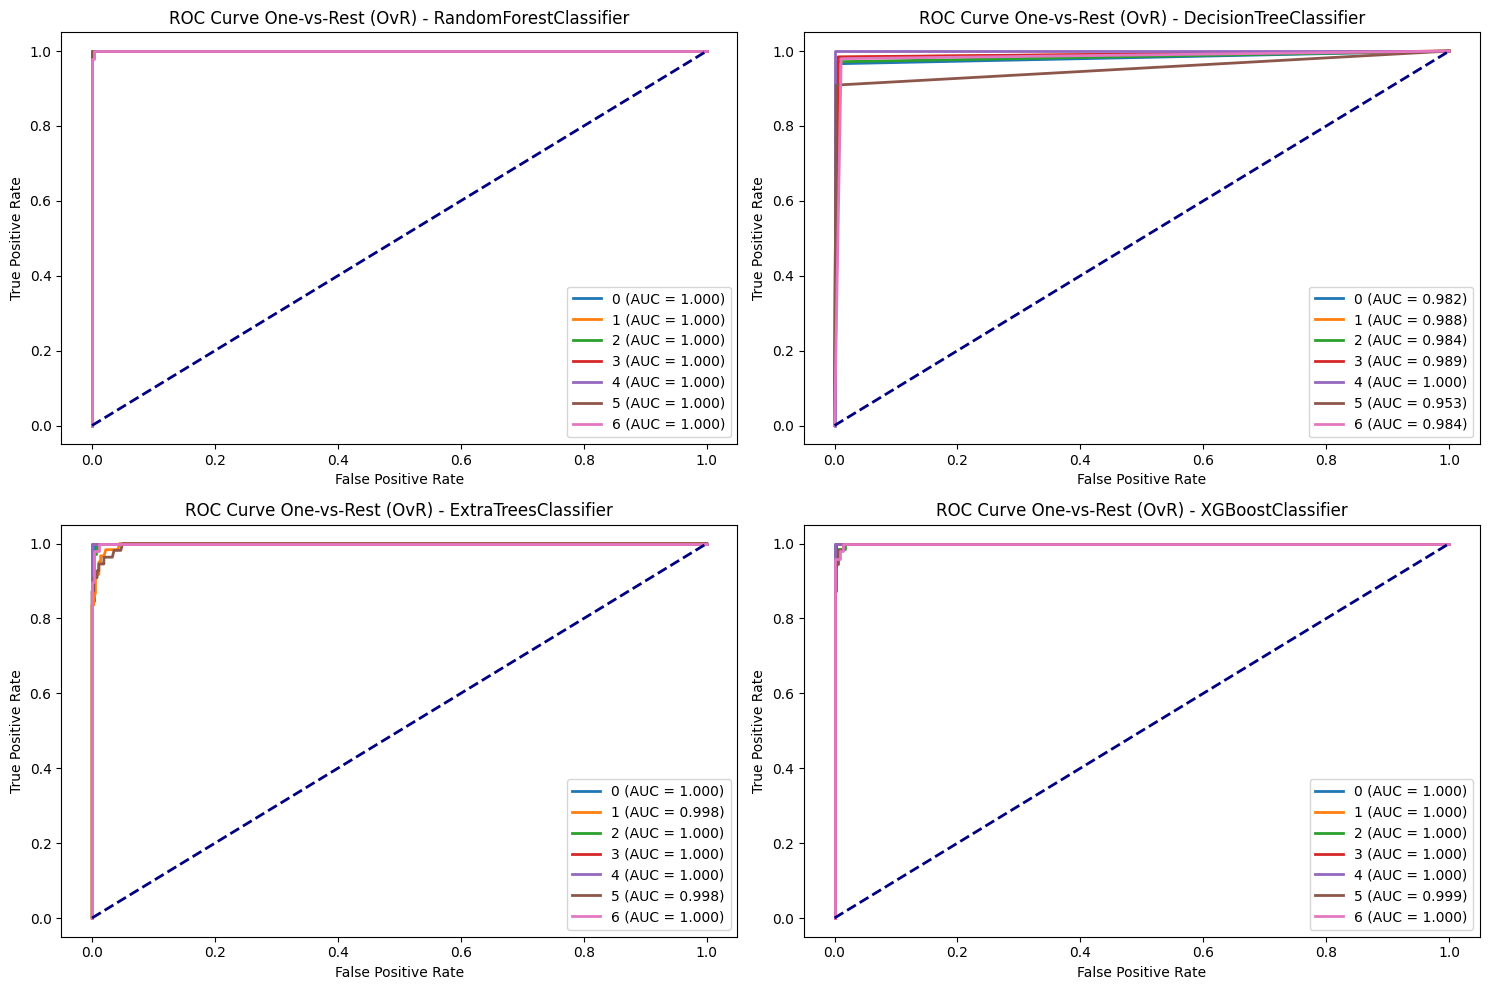

In [72]:
from sklearn.metrics import roc_curve, auc


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Loop over each model and plot its ROC curve in a separate subplot
for idx, (model_name, model) in enumerate(models.items()):
    y_pred_prob = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        axs[idx // 2, idx % 2].plot(fpr[i], tpr[i], lw=2, label=f'{model.classes_[i]} (AUC = {roc_auc[i]:.3f})')
    axs[idx // 2, idx % 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[idx // 2, idx % 2].set_xlabel('False Positive Rate')
    axs[idx // 2, idx % 2].set_ylabel('True Positive Rate')
    axs[idx // 2, idx % 2].set_title(f'ROC Curve One-vs-Rest (OvR) - {model_name}')
    axs[idx // 2, idx % 2].legend(loc='best')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [73]:
import pickle
model=XGBClassifier()
model.fit(X_train, y_train)
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

2024/05/19 12:49:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6ff66c0c2c004cedba6455de8d16f1c5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2024/05/19 12:49:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Int

In [74]:
X_train.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'BMI'],
      dtype='object')

In [75]:
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)

In [76]:
model.predict(X_test)

2024/05/19 12:49:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Vamshi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


array([2, 3, 5, 0, 3, 5, 6, 4, 0, 1, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 1, 1, 3, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 1, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 1, 5, 4, 5, 1, 5, 5, 3, 1,
       6, 2, 5, 2, 6, 1, 5, 6, 4, 5, 5, 1, 4, 1, 6, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 2, 6, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 1, 4, 1, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 6, 4, 6, 5, 2, 6, 1, 5, 0, 3, 5, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 6, 3, 4, 6, 4, 1, 1, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 1,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

In [77]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC',
       'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF',
       'TUE', 'CAEC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

## XGBoost is outperforming all the other models